In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', '{:,.0f}'.format)
pd.set_option('display.max_columns', None)

In [40]:
df = pd.read_csv('../data/cleaned_data.csv')

df['date'] = pd.to_datetime(df['date'])
df.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,transferred,dcoilwtico,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week,is_crisis,sales_lag_7,rolling_mean_7,is_weekend,is_holiday,promo_last_7_days
0,2013-01-01,1,AUTOMOTIVE,0,0,Holiday,National,False,93,Quito,Pichincha,D,13,0,2013,1,1,1,Tuesday,0,0,0,0,1,0
1,2013-01-01,1,BABY CARE,0,0,Holiday,National,False,93,Quito,Pichincha,D,13,0,2013,1,1,1,Tuesday,0,0,0,0,1,0
2,2013-01-01,1,BEAUTY,0,0,Holiday,National,False,93,Quito,Pichincha,D,13,0,2013,1,1,1,Tuesday,0,0,0,0,1,0
3,2013-01-01,1,BEVERAGES,0,0,Holiday,National,False,93,Quito,Pichincha,D,13,0,2013,1,1,1,Tuesday,0,0,0,0,1,0
4,2013-01-01,1,BOOKS,0,0,Holiday,National,False,93,Quito,Pichincha,D,13,0,2013,1,1,1,Tuesday,0,0,0,0,1,0


## 🔍 Question 1: How Have Total Sales Evolved Over Time?

In [41]:
sales_over_time = df.groupby('date')['sales'].sum().reset_index()
fig = px.line(sales_over_time, x='date', y='sales', title="Total Sales Over Time")
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Sales",
    template="plotly",
    title_x=0.5
)
fig.write_html("../visualizations/interactive/sales_over_time.html")
fig.show()

## 🔍 2. Which products or categories contribute the most to total revenue?

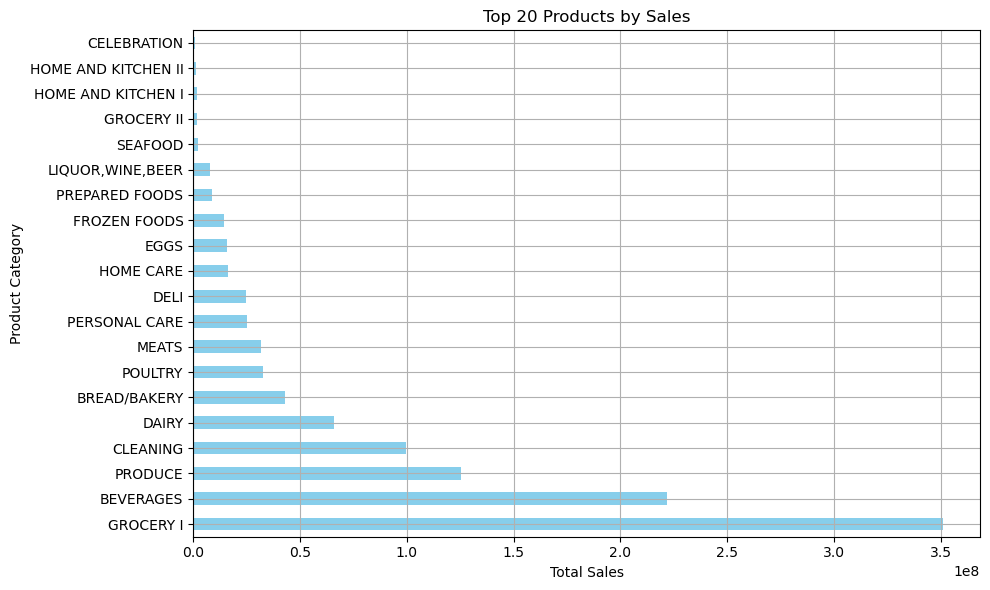

In [42]:
top_products = df.groupby('family')['sales'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='skyblue')
plt.title('Top 20 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.grid(True)
plt.tight_layout()

plt.savefig('../visualizations/static/top_20_products_by_sales.png')

plt.show()

## 🔍 3. Which stores, cities, or states are the top performers in terms of revenue?

1. **Top Stores by Revenue**

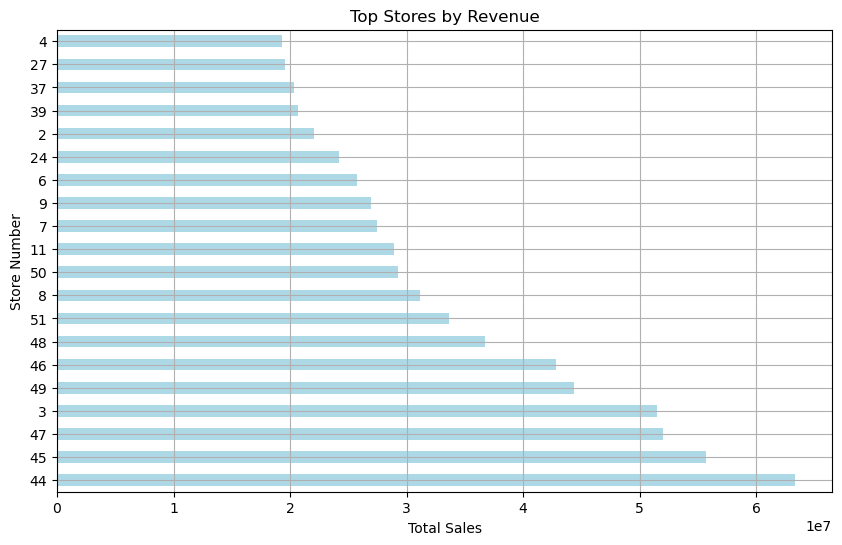

In [43]:
top_stores = df.groupby('store_nbr')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_stores.head(20).plot(kind='barh', color='lightblue')
plt.title('Top Stores by Revenue')
plt.xlabel('Total Sales')
plt.ylabel('Store Number')
plt.grid(True)

plt.savefig('../visualizations/static/top_stores_by_sales.png')
plt.show()

2. **Top Cities by Revenue**

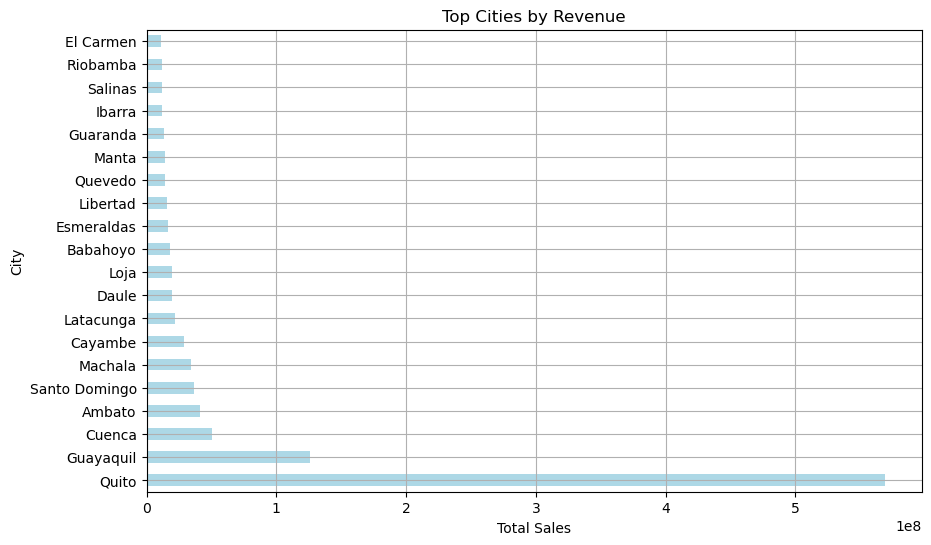

In [44]:
top_cities = df.groupby('city')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_cities.head(20).plot(kind='barh', color='lightblue')
plt.title('Top Cities by Revenue')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.grid(True)

plt.savefig('../visualizations/static/top_cities_by_sales.png')
plt.show()

3. **Top States by Revenue**

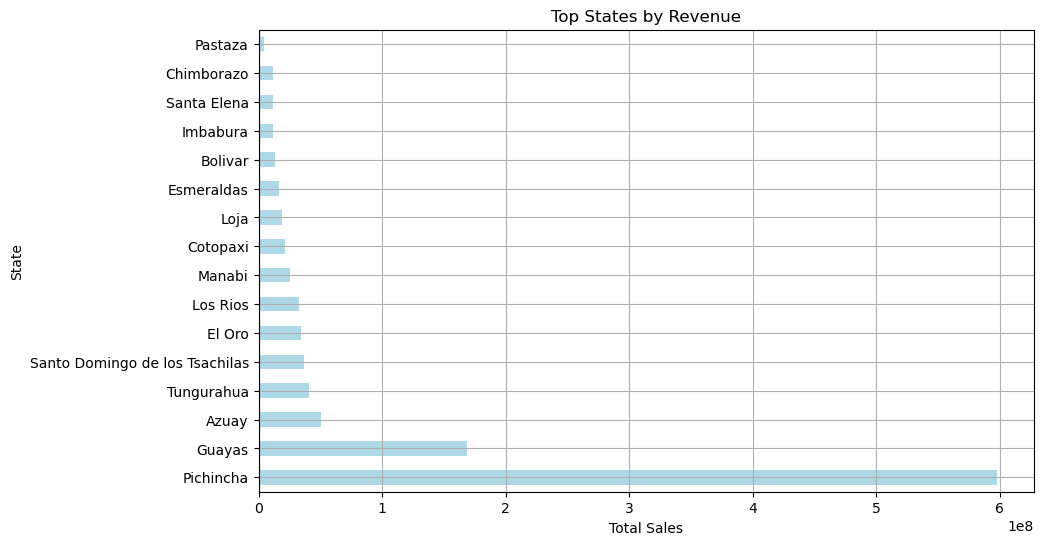

In [45]:
top_regions = df.groupby('state')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_regions.head(20).plot(kind='barh', color='lightblue')
plt.title('Top States by Revenue')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.grid(True)

plt.savefig('../visualizations/static/top_states_by_sales.png')
plt.show()